# ワイヤー配線のインピーダンス解析

Conductor 1 charge density range: 2.2140855742592935e-12 7.615613178653224e-12
Conductor 1 total charge: 2.396095587828184e-18
Conductor 2 charge density range: -7.484459412953662e-12 7.484459412952933e-12
Conductor 2 total charge: -3.2500067811534605e-33
Conductor 3 charge density range: -7.615613178653571e-12 -2.2140855742593714e-12
Conductor 3 total charge: -2.396095587828195e-18
Infinity GND node charge: 5.289724578700294e-37


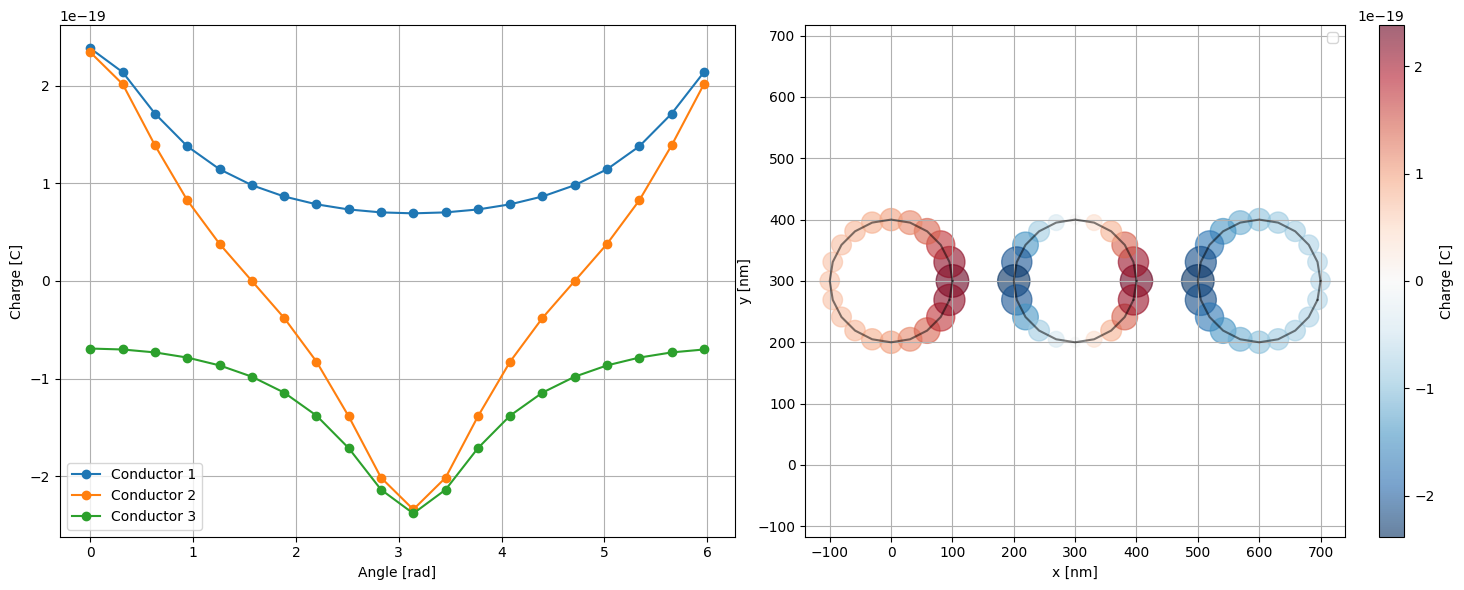

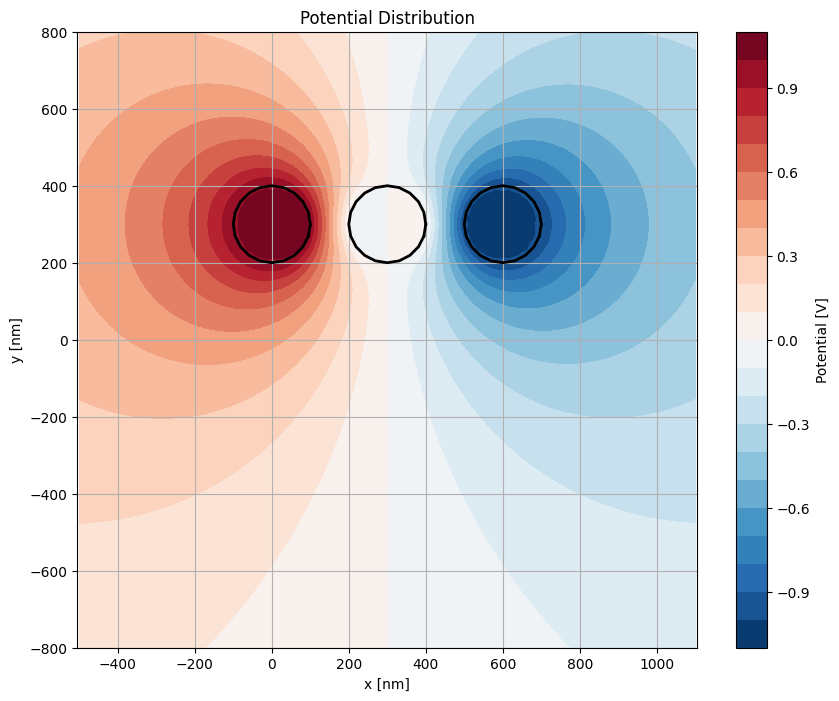

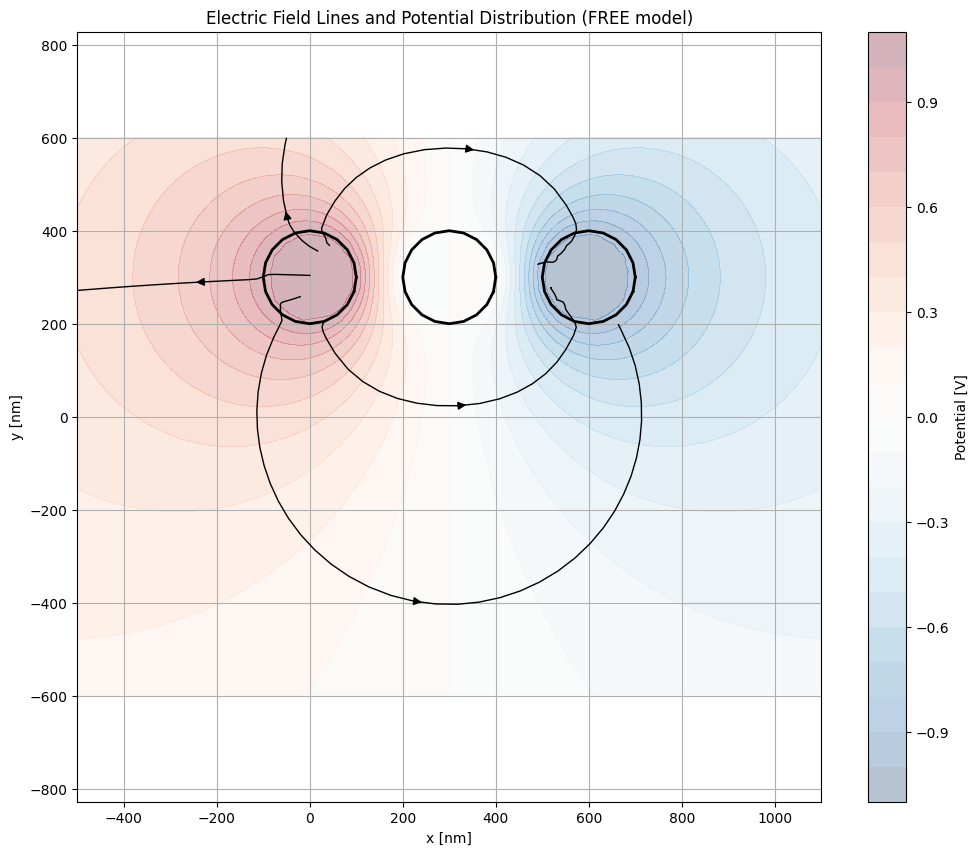


 C Matrix [F/m]:
[[ 6.46432898e-11 -1.19413550e-11]
 [-1.19413550e-11  6.46432898e-11]]

 L Matrix [H/m]:
[[3.56397432e-07 6.58361951e-08]
 [6.58361951e-08 3.56397432e-07]]

 Z Matrix [H/m]:
[[76.83006345 45.92243981]
 [45.92243981 76.83006345]]
Conductor 1 charge density range: 2.4702984837902993e-12 1.502443659125832e-11
Conductor 1 total charge: 3.7693542162273e-18
Conductor 2 charge density range: -1.5024436591258138e-11 -2.4702984837906915e-12
Conductor 2 total charge: -3.7693542162273106e-18
Infinity GND node charge: -2.7624117244323756e-37


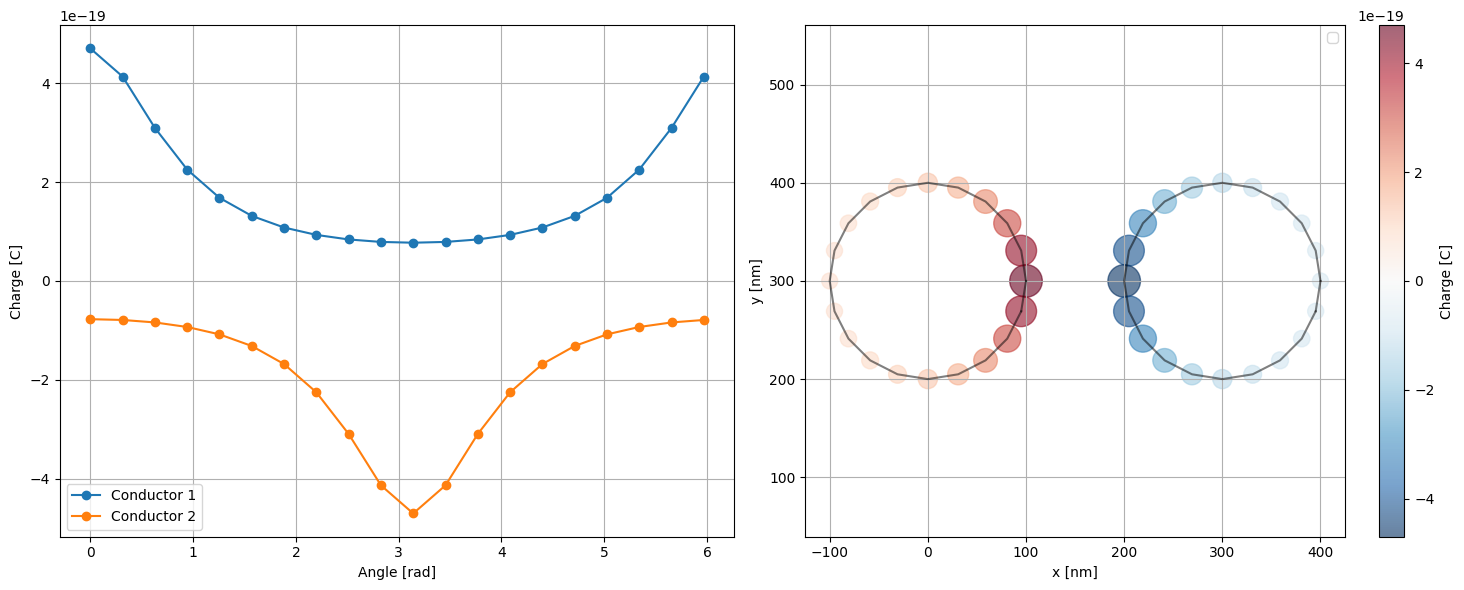

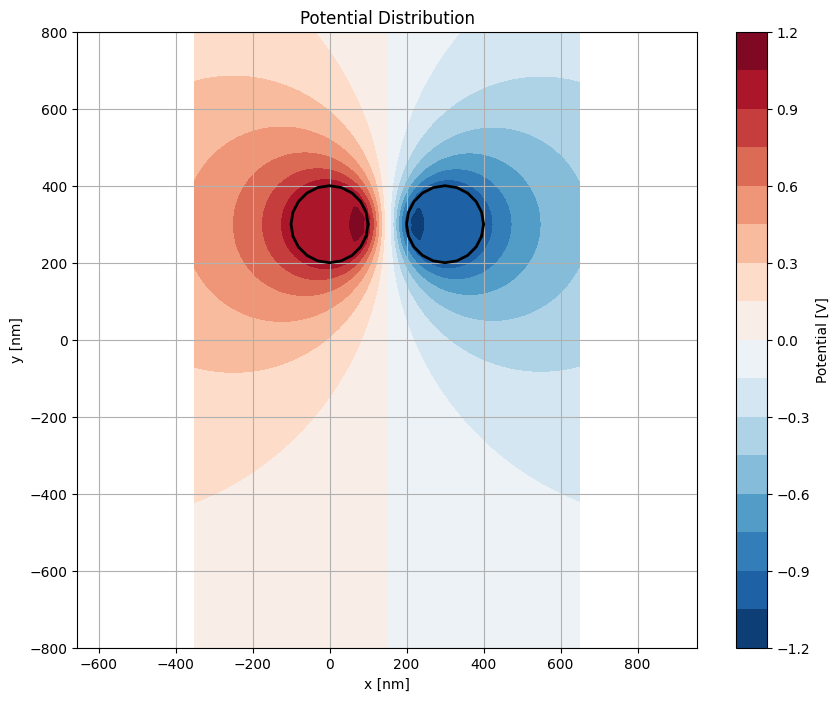

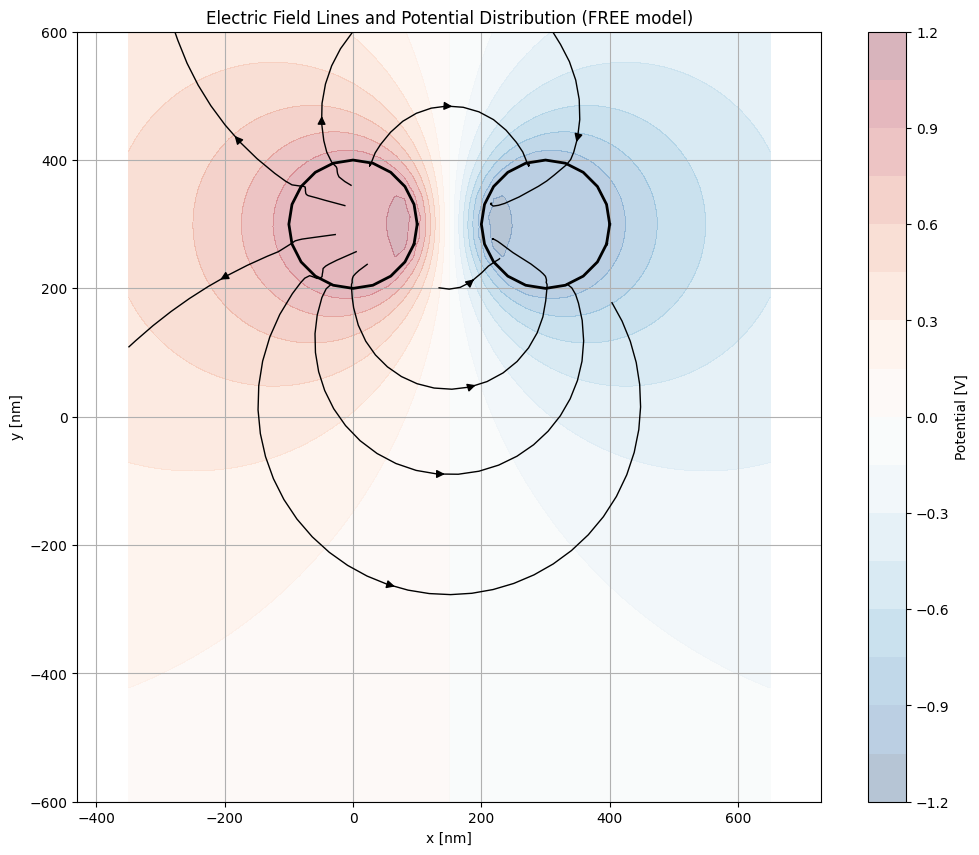


 C Matrix [F/m]:
[[ 6.20331272e-11 -5.84439754e-11]
 [-5.84439754e-11  6.20331272e-11]]

 L Matrix [H/m]:
[[3.19232215e-06 3.00761876e-06]
 [3.00761876e-06 3.19232215e-06]]

 Z Matrix [H/m]:
[[929.76993595 928.94511908]
 [928.94511908 929.76993595]]


In [3]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer


def test_circle():
  calculator = MultiConductorCalculator(type="FREE", epsilon_r=2.0)

  radius = 100e-9
  height = 300e-9
  spacing = 3 * radius
  n=20

  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=0.0)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing , is_gnd=True)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing*2)

  voltages = [1.0,-1.0, 2.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density)
  
  # 電気力線描画
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # ピコファラッド単位で出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_circle.csv", unit_prefix='p')

def test_circle2():
  # GNDが無い場合、無限遠のGNDを考慮することで導体の電荷が±混在しないようになっているかのテスト
  calculator = MultiConductorCalculator(type="FREE", epsilon_r=2.0)

  radius = 100e-9
  height = 300e-9
  spacing = 3 * radius
  n=20

  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=0.0)
  calculator.add_conductor(radius=radius, height=height, N_points=n, x_offset=spacing)

  voltages = [1.0,-1.0]
  charge_density = calculator.solve_charge_density(voltages)

  visualizer = MultiConductorVisualizer(calculator)
  visualizer.plot_chage_distribution(charge_density)
  visualizer.plot_potential(charge_density)
  
  # 電気力線描画
  visualizer.plot_electric_field_lines(charge_density, n_lines=20)

  C = calculator.calculate_capacitance_matrix()
  print("\n C Matrix [F/m]:")
  print(C)

  L = calculator.calculate_inductance_matrix()
  print("\n L Matrix [H/m]:")
  print(L)

  Z = calculator.calculate_z_matrix()
  print("\n Z Matrix [H/m]:")
  print(Z)

  # ピコファラッド単位で出力
  exporter = MultiConductorExporter(calculator)
  exporter.export_capacitance_matrix("./out/test_circle.csv", unit_prefix='p')


if __name__ == "__main__":
  test_circle()
  test_circle2()
  